### torch的组成
- torch 类似于Numpy的通用数组库,可以在GPU上运行
- torch.autograd 自动求取梯度
- torch.nn 具有共享层和损失函数的神经网络库
- torch.optim 具有通用优化算法的优化包

### torch的安装 (CPU版)
https://pytorch.org/
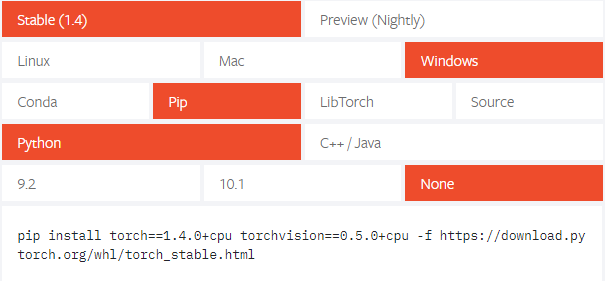

    pip install torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html -i https://pypi.tuna.tsinghua.edu.cn/simple

### Tensor
Tensor称为神经网络界的Numpy, 它与Numpy相似，二者共享内存，互相转换非常方便和高效

#### 1 创建tensor

In [1]:
import torch

torch.tensor(data, dtype=None, device=None, requires_grad=False)
torch.tensor会从data中的数据部分做拷贝（而不是直接引用），根据原始数据类型生成相应的torch.LongTensor、torch.FloatTensor和torch.DoubleTensor

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.tensor([1,2,3], device=torch.device('cuda'), requires_grad=False)

C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:81: UserWarning: 
    Found GPU0 GeForce GTX 660 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


tensor([1, 2, 3], device='cuda:0')

In [8]:
torch.tensor([1,2,3], device=torch.device('cpu'), requires_grad=False)

tensor([1, 2, 3])

In [9]:
torch.tensor([4,5,6])

tensor([4, 5, 6])

In [11]:
# 返回浮点型的类似于empyty值
t1 = torch.Tensor(1)
# 返回整形确定的数
t2 = torch.tensor(1)
print(t1,t1.dtype)
print(t2,t2.dtype)

tensor([1.1000]) torch.float32
tensor(1) torch.int64


In [12]:
a = torch.tensor([1,2,3])
a.type()

'torch.LongTensor'

In [13]:
type(a)

torch.Tensor

In [4]:
a

tensor([1, 2, 3])

In [14]:
b = torch.tensor([1.0,2.0,3.0])
b.type()

'torch.FloatTensor'

In [15]:
torch.eye(5)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [7]:
torch.zeros((3,3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [16]:
torch.linspace(11,20,10)

tensor([11., 12., 13., 14., 15., 16., 17., 18., 19., 20.])

In [9]:
torch.rand(2,3)

tensor([[0.8727, 0.1148, 0.2371],
        [0.3648, 0.6094, 0.1167]])

In [10]:
torch.randn(2,3)

tensor([[-0.8238, -0.2758, -1.0270],
        [-2.2199, -0.7805, -1.6577]])

In [18]:
torch.randint(1,10,(2,3))

tensor([[5, 9, 4],
        [7, 9, 3]])

In [19]:
import numpy as np
 
A = np.arange(0, 40,10).reshape(4, 1)
B = np.arange(0, 3)
#把ndarray转换为Tensor


In [24]:
A

array([[ 0],
       [10],
       [20],
       [30]])

In [21]:
B

array([0, 1, 2])

In [22]:
A1=torch.from_numpy(A)  #形状为4x1
B1=torch.from_numpy(B)  #形状为3
print(A1)
print(B1)

tensor([[ 0],
        [10],
        [20],
        [30]], dtype=torch.int32)
tensor([0, 1, 2], dtype=torch.int32)


#### 2. 修改tensor形状

In [25]:
# torch中的随机种子
torch.manual_seed(42)
t = torch.randn(2,3)
t

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]])

In [13]:
t.size()

torch.Size([2, 3])

In [14]:
t.shape

torch.Size([2, 3])

In [15]:
t.dim()

2

In [26]:
# 改变形状
t1 = t.view(3,2)
t1

tensor([[ 0.3367,  0.1288],
        [ 0.2345,  0.2303],
        [-1.1229, -0.1863]])

In [18]:
# 改变形状
t2 = torch.reshape(t,(3,2))
t2

tensor([[ 0.3607, -0.2859],
        [-0.3938,  0.2429],
        [-1.3833, -2.3134]])

In [28]:
t1.reshape(2,3)

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]])

#### 3. 索引切片

In [19]:
x = torch.randn(2,3)
x

tensor([[-0.3172, -0.8660,  1.7482],
        [-0.2759, -0.9755,  0.4790]])

In [20]:
x[0,:]

tensor([-0.3172, -0.8660,  1.7482])

In [21]:
x[:,0]

tensor([-0.3172, -0.2759])

In [22]:
torch.masked_select(x,x>0) #

tensor([1.7482, 0.4790])

#### 4. 逐元素操作

In [33]:
import torch
t = torch.Tensor([1,2,3])
t+1

tensor([2., 3., 4.])

In [34]:
t.dtype

torch.float32

In [36]:
t = torch.tensor([-1.0,2.0,3.0])

In [37]:
t.dtype

torch.float32

In [38]:
print(torch.exp(t))
print(torch.log(t))
print(torch.pow(t,2))
print(torch.sqrt(t))

tensor([ 0.3679,  7.3891, 20.0855])
tensor([   nan, 0.6931, 1.0986])
tensor([1., 4., 9.])
tensor([   nan, 1.4142, 1.7321])


In [39]:
print(torch.sigmoid(t))
print(torch.tanh(t)) #双曲正切
print(torch.relu(t))

tensor([0.2689, 0.8808, 0.9526])
tensor([-0.7616,  0.9640,  0.9951])
tensor([0., 2., 3.])


In [40]:
x = torch.tensor([1,2])
y = torch.tensor([3,4])
z1 = torch.add(x,y) #np.add(x,y)
z2 = x.add(y) # x.add(y)
print(z1)
print(z2)

tensor([4, 6])
tensor([4, 6])


In [27]:
# 逐元素相乘,mul数量积  .dot
torch.mul(x,y) 

tensor([3, 8])

#### 5. 归并操作
归并操作一般都会涉及一个dim参数,指定沿哪个方向归并,类似于axis

In [5]:
t = torch.randn(2,3)
t

tensor([[ 0.9240,  1.4827, -0.3131],
        [-0.2656,  1.7783, -0.5698]])

In [6]:
# 均值
torch.mean(t,dim=1)

tensor([0.6979, 0.3143])

In [7]:
#标准差
torch.std(t,dim=1)

tensor([0.9190, 1.2770])

In [8]:
#累加
torch.cumsum(t,dim=0)

tensor([[ 0.9240,  1.4827, -0.3131],
        [ 0.6584,  3.2609, -0.8829]])

In [9]:
#累乘 product
torch.cumprod(t,dim=1)

tensor([[ 0.9240,  1.3700, -0.4289],
        [-0.2656, -0.4724,  0.2692]])

In [10]:
#范数
torch.norm(t,p=2,dim=1)

tensor([1.7748, 1.8861])

#### 6. 比较操作

In [34]:
t = torch.tensor([[1,2,3],[4,5,6]])
t

tensor([[1, 2, 3],
        [4, 5, 6]])

In [35]:
torch.max(t,dim=1)

torch.return_types.max(
values=tensor([3, 6]),
indices=tensor([2, 2]))

In [36]:
torch.topk(t,k=1,dim=1)

torch.return_types.topk(
values=tensor([[3],
        [6]]),
indices=tensor([[2],
        [2]]))

#### 7. 矩阵操作

In [37]:
# 一维矩阵的点积 .dot
a=torch.tensor([2, 3])
b=torch.tensor([3, 4]) 
torch.dot(a,b) 

tensor(18)

In [41]:
# 二维矩阵的点积
x=torch.randint(10,(2,3))
y=torch.randint(6,(3,4))
torch.mm(x,y)

tensor([[ 9, 23, 21,  5],
        [36, 48, 32, 14]])

In [42]:
x

tensor([[0, 4, 1],
        [2, 5, 5]])

In [43]:
y

tensor([[3, 4, 1, 2],
        [1, 5, 5, 1],
        [5, 3, 1, 1]])

#### Pytorch Numpy对比

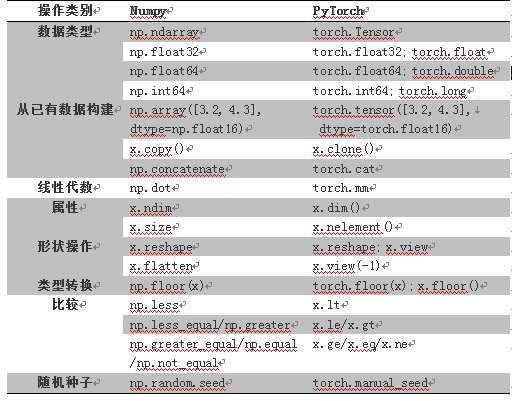